In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import requests
from PIL import Image, ImageOps
from scipy.linalg import svd

#### Problem 1

Explanation: To determine the number of linearly independent columns (i.e. the rank) of a matrix A, we can apply a numerical SVD factorization method to the matrix. 
The number of non-zero values in the sigma (singular values) matrix will represent the rank of the matrix A.

In [54]:
#### Code

A = np.array([
    [-1.32, -0.18, 2.13], 
    [2.64,  -4.68, 4.65], 
    [1.47,  -4.75, 6.80]
])

_, S, _ = svd(A)
rank = np.count_nonzero(np.round(S, decimals=4))
print("number of LI columns in A (i.e. its rank): ", rank)


number of LI columns in A (i.e. its rank):  3


#### Problem 2

In [55]:
#TO_DO: handwritten explanation

Python Explanation:
We can reproduce the handwritten approach programmatically to determine the parameters for the best fit linear estimate using least squares estimation:

In [56]:
x = np.array([-1.0, 2.5, 6.0, -3.5, 3.0, 8.5])
B = np.array([8.5, 3.0, -5.5, 13.0, 0.0, -10.0])
A = np.zeros((x.size, 2))
for i, elem in enumerate(x):
    A[i] = np.array([elem, 1])

AT = np.transpose(A)

## note: component C1: (ATranspose * A) ends up having a non-zero determinant, proving it is invertible
## this number also matches our handwritten expression above
C1 = np.dot(AT, A)
# print(round(np.linalg.det(C1)), "\n")

C1_INV = np.linalg.inv(C1)
C2 = np.dot(AT, B)

## SOLUTION: this is the parameter q we are solving for in Aq = p_hat 
# (where p_hat is our closest vector estimate that still falls in A's columnspace)
LEAST_SQ_EST_PARAMS = np.round(np.dot(C1_INV, C2), 2)
print(LEAST_SQ_EST_PARAMS)

[-1.94  6.52]


#### Problem 3

Yes, `w_1`, `w_2` and `w_3` would be a valid set of basis vectors for `R_3`. There are two considerations here:
1. Dimensional consistency: Each vector is made of up three components, one for each dimension of R_3
2. Linear Independence: If you concatenate the three vectors together, you can quickly see that they are linear independent because they form a 3x3 matrix in upper triangular form. 

Note: The bottom components of `w_1` and `w_2` are both 0, indicating that there would be no possible linear combination of those two vectors that would yield the required "k_hat" component (`1`) in the `w_3` vector.

#### Problem 4

Similarly (to problem 3), `t_1`, `t_2` and `t_3` form a valid set of basis vectors for `R_3`. Once again, concatenating these three vectors forms an upper triangular matrix (and therefore one with linear independent column vectors). Additionally, note that this combination of vectors represents a rotation matrix about the "z" axis, which would mean that the transformation does not reduce the dimensionality of the output vectorspace (i.e. this matrix would be invertible, which can be further proven by showing the determinant of the matrix to be non-zero. It will be 1 which represents a pure retention of the area of columnspace represented by A).

In [57]:
A = np.array([
    [0.707,   0.707,  0], 
    [-0.707,  0.707,  0], 
    [0,       0,      1]
])

print("det(A): ", round(np.linalg.det(A)))

det(A):  1


#### Problem 5

The vectors `w_1` through `w_4` do span `R_3` since they each have 3 components, one for each dimension of `R_3`. However, they are not all linearly independent and therefore would not form a basis for `R_3`. Note that `w_1` through `w_3` by themselves would form an upper triangular matrix and would therefore be easily identified as being linearly independent, similar to Problems 3 and 4. `w_4` can be derived as a linear combination of `2(w_1) - w_2 + 3(w_3)` and is therefore redundant. The arithmetic would look like:

```python
# [
#     2(1) -1(1) + 3(0) = 1,
#     2(0) -1(1) + 3(1) = 2,
#     2(0) -1(0) + 3(1) = 3
# ]
```


#### Problem 6

In [58]:
# APPROACH: I'm using exclusively randomly generated values to show that SVD can always be used to determine rank
# (even for linear combinations of floats)

# we generate a third vector v3 by performing a random linear combination of v1 and v2
coeffs = (np.random.randint(10), round(np.random.randint(10)))
v1 = np.random.randint(-10, 10, size=3)
v2 = np.random.randint(-10, 10, size=3)
v3 = np.array([(coeffs[0]*a - coeffs[1]*b) for a, b in zip(v1, v2)])
print("component vectors v1, v2, v3: \n", v1, "\n",  v2, "\n",  v3, "\n")

A = np.stack((v1, v2, v3), axis=1)
print("target matrix A: \n", A, "\n")

# we then perform SVD on the overall matrix, and filter out any almost-zero singular values
# counting the rest of the singular values yields the rank of the original matrix M
_, S, VT = svd(A)
rank = np.count_nonzero(np.round(S, decimals=4))
print("number of LI columns in A (i.e. its rank): ", rank)

# general nullspace intuition: for matrices that are not full rank (output vectorspace is reduced to a lower dimension),
# there is a set of input vectors that will end up being transformed to the 0 vector. This set is called the nullspace. 

# note: the last n - r columns in VT form a set of orthonormal basis vectors of the matrix A's nullspace
zero_sv_column_indices = (S < 0.0001).nonzero()[0]
nullspace_basis = VT[:,zero_sv_column_indices]
print("an orthonormal set of basis vectors for the nullspace of A: \n", nullspace_basis)


component vectors v1, v2, v3: 
 [-7 -3 -2] 
 [-8  6  7] 
 [ 17 -21 -23] 

target matrix A: 
 [[ -7  -8  17]
 [ -3   6 -21]
 [ -2   7 -23]] 

number of LI columns in A (i.e. its rank):  2
an orthonormal set of basis vectors for the nullspace of A: 
 [[ 0.94731767]
 [-0.1080747 ]
 [-0.30151134]]


#### Problem 7

x:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 
 B:  [ 3.54 10.36 13.89 13.25 14.24 22.48 21.56 27.74 28.33 31.02] 

least squares params:  [2.88 5.67]
p_hat (best fit dataset):  [ 5.67  8.55 11.43 14.31 17.19 20.07 22.95 25.83 28.71 31.59]


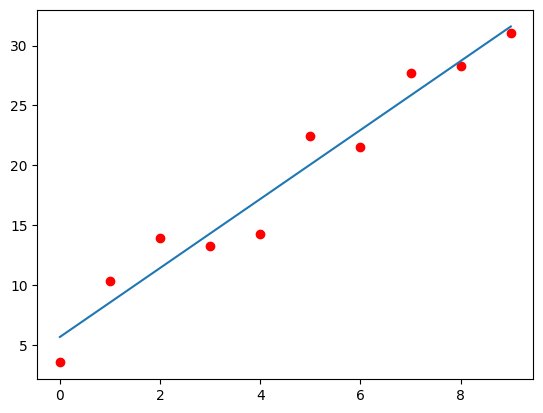

In [59]:
## SETUP: generating a dataset of 10 points with some incoporated noise (plotted in red)
c, d = 3, 5
dev = 3
x = np.linspace(0, 9, num=10)
B = np.zeros(x.size)
for i,_ in enumerate(x):
    noise = round(random.uniform(-1*dev, dev), 2)
    B[i] = c*(x[i]) + d + noise

print("x: ", x, "\n", "B: ", B, "\n")

## LEAST SQUARES SOLUTION: similar approach to Problem 2: plotted as a blue line below
A = np.zeros((x.size, 2))
for i, elem in enumerate(x):
    A[i] = np.array([elem, 1])

AT = np.transpose(A)

C1 = np.dot(AT, A)
# print(round(np.linalg.det(C1)), "\n")

C1_INV = np.linalg.inv(C1)
C2 = np.dot(AT, B)

# SOLUTION: the vector q we are solving for in Aq = p_hat encodes the slope and offset of the LS best-fit line
# (where p_hat is our closest vector estimate that still falls in A's columnspace)
LEAST_SQ_EST_PARAMS = np.round(np.dot(C1_INV, C2), 2)
print("least squares params: ", LEAST_SQ_EST_PARAMS)

p_hat = np.zeros(x.size)
for i,_ in enumerate(x):
    p_hat[i] = LEAST_SQ_EST_PARAMS[0]*(x[i]) + LEAST_SQ_EST_PARAMS[1]

print("p_hat (best fit dataset): ", p_hat)

plt.plot(x, B, 'ro')
plt.plot(x, p_hat)
plt.show()


#### Problem 8

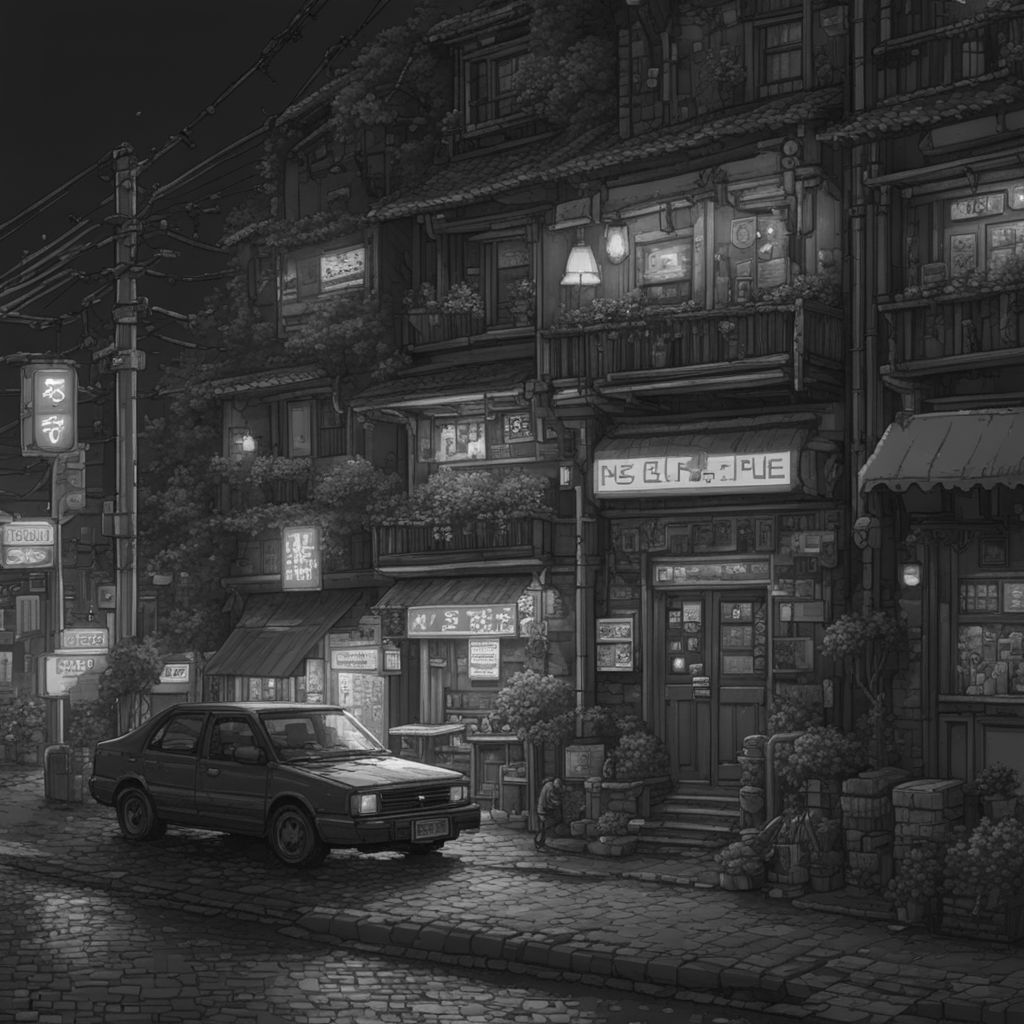

Shape of the image: (1024, 1024)
Data type of the image array elements (pixels essentially): uint8
Image dimension: 1024 (height) x 1024 (width)


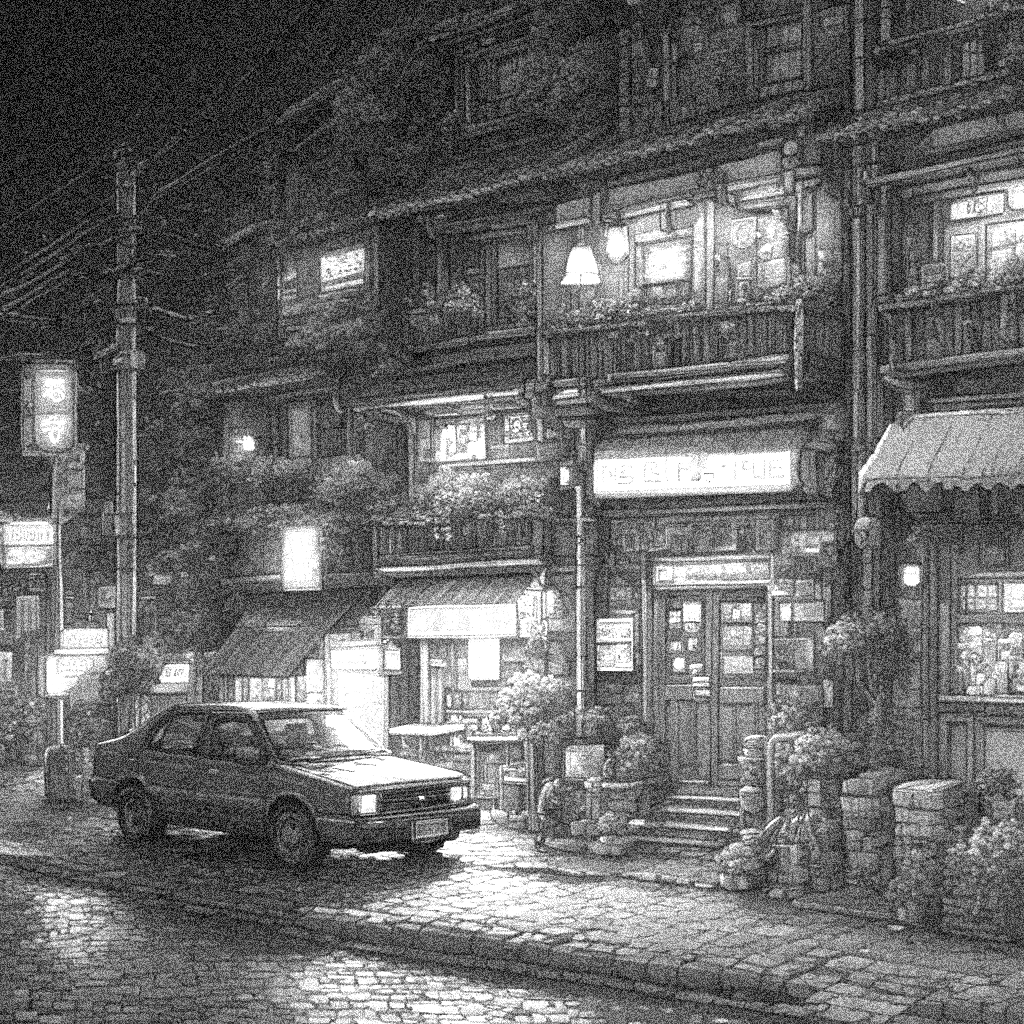

In [170]:
## Step 1: retrieve a stock image and dim and grain it

url = 'https://storage.googleapis.com/pai-images/9d1e44c35eca471f88a7340e63177d27.jpeg'
response = requests.get(url, stream=True)
img_raw = ImageOps.grayscale(Image.open(response.raw))
display(img_raw)

img = np.array(img_raw)
H, W = img.shape
print(f'Shape of the image: {img.shape}')
print(f'Data type of the image array elements (pixels essentially): {img.dtype}')
print(f'Image dimension: {H} (height) x {W} (width)')

a, b, c = 0.001, 0.001, 1.00
f = lambda x, y: a * x + b * y + c

f_output = np.ones(img.shape)
noise    = np.ones(img.shape)

x_coordinates = np.arange(0, W)
y_coordinates = np.arange(0, H)
# TO_DO: np.vectorize + lambda for better performance
for y in y_coordinates:
  for x in x_coordinates:
    f_output[y, x] = f(y, x)
    noise[y, x] = random.randint(-50, 50)

dimmed_gradient = np.clip((f_output * img) + noise, 0, 255) # u can also do scaling
display(Image.fromarray(dimmed_gradient.astype(np.uint8)))

# Step 2: 


